### Confirm Tensorflow Installation

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


### Importing the necessary modules

In [2]:
import numpy as np
import os
from os import listdir 
from os.path import isfile, join
import cv2

import tensorflow as tf
import tensorflow.keras as keras


### Loading and Preprocessing

In [3]:
#Data visiting – os.walk()

label_folder = []
total_size = 0
data_path = r"D:\CIFAR10_Test Image\Training_data"

#os.walk() generates the file names(dirpath, dirnames, filenames) 
#in a directory tree by walking the tree either top-down or bottom-up.
for root, dirts, files in os.walk(data_path): 
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)

    
print("found",total_size,"files.")
print("folder:",label_folder)

found 5000 files.
folder: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [4]:
#Load image

base_x_train = []
base_y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_train.append(img)
        base_y_train.append(label_folder[i])


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(5000, 32, 32, 3)
(5000,)


In [5]:
from tensorflow.keras.utils import to_categorical

#Convert a category vector to a binary (0 or 1) matrix-type representation

base_y_train = to_categorical(base_y_train)


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(5000, 32, 32, 3)
(5000, 10)


### Splitting the Data into training and validation data

In [123]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split( \
    np.array(base_x_train), np.array(base_y_train), test_size=0.2, random_state = 0)


print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_valid.shape, y_valid.shape)

Training data: (4000, 32, 32, 3) (4000, 10)
Validation data: (1000, 32, 32, 3) (1000, 10)


### Show the image

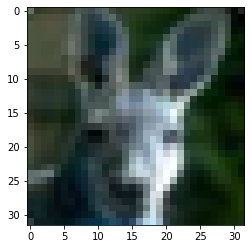

Answer: 6
Answer(one-hot): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [114]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0])
plt.imshow(x_train[idx])
plt.show()

print("Answer:", np.argmax(y_train[idx]))
print("Answer(one-hot):", y_train[idx])

array([[  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

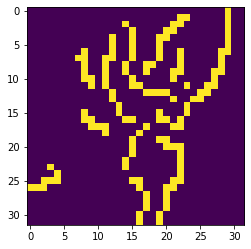

In [115]:
gray = cv2.cvtColor(x_train[idx], cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
canny = cv2.Canny(blurred, 180, 200)
plt.imshow(canny)
canny

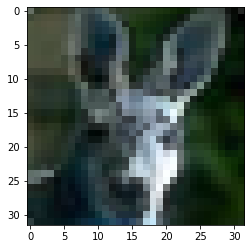

In [116]:
for i in range(3):
    x_train[idx][:,:,i][canny>0] = x_train[idx][:,:,i][canny>0]*0.6

plt.imshow(x_train[idx])

In [117]:
for s in range(x_train.shape[0]):
    gray = cv2.cvtColor(x_train[s], cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    canny = cv2.Canny(blurred, 180, 200)
    for i in range(3):
        x_train[s][:,:,i][canny>0] = x_train[s][:,:,i][canny>0]*0.6

In [118]:
for s in range(x_valid.shape[0]):
    gray = cv2.cvtColor(x_valid[s], cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    canny = cv2.Canny(blurred, 180, 200)
    for i in range(3):
        x_valid[s][:,:,i][canny>0] = x_valid[s][:,:,i][canny>0]*0.6

In [124]:
from sklearn import preprocessing

x_train = preprocessing.scale(x_train)
y_train = preprocessing.scale(y_train)

ValueError: Found array with dim 4. the scale function expected <= 2.

### Build the network

You can show the detail for it:

In [120]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [121]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)        

### Training the network

In [122]:
epoch = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    validation_data=(x_valid, y_valid)
)

Epoch 1/30
125/125 [==============================] - 6s 45ms/step - loss: 0.0092 - accuracy: 0.1007 - val_loss: 2.2965 - val_accuracy: 0.1520
Epoch 2/30
125/125 [==============================] - 6s 48ms/step - loss: 0.0090 - accuracy: 0.0843 - val_loss: 2.3068 - val_accuracy: 0.1020
Epoch 3/30
125/125 [==============================] - 6s 49ms/step - loss: 0.0090 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0920
Epoch 4/30
125/125 [==============================] - 6s 49ms/step - loss: 0.0090 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.0820
Epoch 5/30
125/125 [==============================] - 6s 49ms/step - loss: 0.0090 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1170
Epoch 6/30
125/125 [==============================] - 6s 49ms/step - loss: 0.0090 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 7/30
 66/125 [==============>...............] - ETA: 2s - loss: 0.0090 - accuracy: 0.0923

KeyboardInterrupt: 

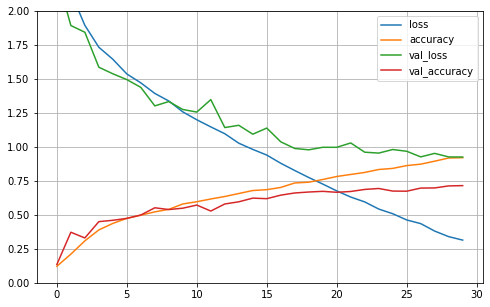

32/32 [==============================] - 1s 17ms/step - loss: 0.9255 - accuracy: 0.7150
Predict probabilities: [[0.67 0.   0.16 0.01 0.   0.   0.01 0.   0.14 0.  ]
 [0.   0.   0.04 0.06 0.01 0.02 0.52 0.26 0.02 0.07]
 [0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.93]]
Predict answers: [0 6 9]


In [49]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

model.evaluate(x_valid, y_valid)

x_new = x_valid[:3]
y_predict = model.predict(x_new)
print("Predict probabilities:", y_predict.round(2))
print("Predict answers:", y_predict.argmax(axis=1))

### Saving the trained weights

In [112]:
model.save("my_model73.hdf5")

In [113]:
from tensorflow.keras.models import load_model
model2 = load_model("my_model73.hdf5")

In [114]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)        

In [115]:
y_hat = model2.predict(x_valid)

In [116]:
# 將output改為標籤
output_y = np.zeros(y_hat.shape[0])

for i in range(y_hat.shape[0]):
    for j in range(y_hat.shape[1]):
        if y_hat[i, j] >= max(y_hat[i, ]):
            output_y[i] = j

output_y

array([0., 6., 9., 9., 1., 5., 4., 8., 0., 5., 2., 2., 9., 0., 1., 6., 0.,
       3., 3., 4., 0., 4., 0., 8., 9., 2., 6., 5., 4., 2., 8., 7., 3., 4.,
       7., 0., 7., 1., 9., 6., 7., 0., 9., 3., 1., 6., 1., 4., 2., 6., 7.,
       7., 0., 3., 3., 8., 1., 9., 4., 5., 3., 1., 5., 6., 8., 0., 7., 0.,
       1., 4., 0., 7., 1., 7., 1., 2., 2., 0., 7., 6., 5., 0., 7., 0., 4.,
       1., 7., 2., 3., 7., 6., 4., 8., 1., 0., 5., 5., 8., 5., 6., 1., 2.,
       9., 8., 1., 4., 7., 3., 8., 0., 0., 8., 6., 5., 4., 5., 8., 7., 5.,
       5., 4., 8., 2., 8., 6., 7., 0., 4., 9., 2., 1., 9., 6., 1., 9., 6.,
       0., 3., 2., 6., 8., 0., 5., 8., 4., 3., 8., 7., 6., 6., 0., 6., 8.,
       8., 0., 1., 9., 4., 0., 8., 7., 9., 7., 1., 3., 6., 9., 7., 4., 5.,
       4., 7., 8., 1., 4., 5., 7., 5., 3., 3., 0., 0., 2., 0., 6., 0., 6.,
       0., 9., 5., 8., 8., 5., 0., 0., 5., 9., 3., 8., 1., 1., 4., 6., 0.,
       6., 1., 8., 4., 7., 0., 7., 3., 5., 7., 1., 8., 0., 8., 4., 0., 7.,
       6., 5., 6., 9., 2.

In [117]:
output_yv = np.zeros(y_valid.shape[0])

for i in range(y_valid.shape[0]):
    for j in range(y_valid.shape[1]):
        if y_valid[i, j] >= max(y_valid[i, ]):
            output_yv[i] = j

output_yv

array([0., 7., 9., 9., 1., 5., 2., 4., 0., 5., 8., 2., 9., 0., 1., 6., 0.,
       5., 3., 4., 0., 3., 0., 8., 9., 2., 6., 8., 7., 0., 8., 7., 8., 3.,
       4., 2., 7., 7., 7., 6., 7., 5., 9., 3., 1., 4., 1., 8., 0., 6., 7.,
       7., 0., 3., 3., 8., 1., 9., 4., 5., 4., 1., 5., 6., 8., 0., 4., 5.,
       9., 4., 0., 7., 1., 7., 1., 2., 2., 0., 7., 6., 5., 0., 7., 0., 2.,
       1., 2., 2., 3., 7., 6., 1., 8., 1., 0., 5., 5., 8., 5., 2., 1., 2.,
       9., 8., 1., 7., 7., 3., 8., 3., 0., 8., 7., 2., 2., 5., 8., 7., 8.,
       5., 4., 8., 2., 8., 9., 7., 0., 4., 9., 2., 1., 9., 6., 1., 1., 7.,
       3., 8., 4., 6., 4., 0., 6., 8., 4., 3., 8., 7., 7., 6., 0., 7., 8.,
       8., 0., 1., 9., 4., 0., 8., 1., 9., 7., 1., 3., 6., 9., 9., 8., 2.,
       4., 8., 8., 1., 4., 5., 7., 5., 8., 3., 2., 0., 2., 0., 6., 0., 6.,
       0., 9., 5., 8., 9., 0., 2., 0., 5., 9., 3., 8., 1., 1., 7., 6., 0.,
       4., 1., 8., 4., 7., 3., 7., 5., 5., 7., 1., 8., 0., 7., 4., 0., 9.,
       6., 4., 6., 1., 2.

In [118]:
sum(output_y == output_yv) / len(output_y)

0.735

In [119]:
# 結果寫入檔案開始

file_name = []
total_size = 0
data_path = r"D:\CIFAR10_Test Image\Testing_data"

for root, dirts, files in os.walk(data_path):
    for file in files:
        file_name.append(file)
        
    total_size += len(files)

print('found {} files.'.format(total_size))


found 1000 files.


In [120]:
base_x_test = []

for i in range(len(file_name)):
    label_path = data_path + '\\' + file_name[i]

    img = cv2.imread(label_path, cv2.IMREAD_COLOR)
    base_x_test.append(img)

print(np.array(base_x_test).shape)

(1000, 32, 32, 3)


In [122]:
for s in range(np.array(base_x_test).shape[0]):
    gray = cv2.cvtColor(np.array(base_x_test)[s], cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    canny = cv2.Canny(blurred, 30, 200)
    for i in range(3):
        np.array(base_x_test)[s][:,:,i][canny>0] = np.array(base_x_test)[s][:,:,i][canny>0]*0.4

In [123]:
y_final = model2.predict(np.array(base_x_test))

In [124]:
output_y2 = np.zeros(y_final.shape[0])

for i in range(y_final.shape[0]):
    for j in range(y_final.shape[1]):
        if y_final[i, j] >= max(y_final[i, ]):
            output_y2[i] = j

output_y2

array([2., 9., 8., 1., 4., 4., 3., 9., 3., 7., 4., 2., 1., 1., 0., 1., 8.,
       8., 5., 3., 8., 5., 1., 6., 1., 4., 0., 0., 7., 0., 4., 4., 9., 4.,
       9., 8., 8., 6., 0., 4., 2., 5., 7., 4., 7., 8., 3., 0., 7., 7., 8.,
       7., 3., 2., 9., 4., 6., 1., 9., 0., 9., 4., 2., 6., 7., 4., 8., 3.,
       9., 7., 5., 5., 6., 9., 7., 7., 1., 8., 2., 1., 1., 1., 3., 7., 3.,
       3., 8., 9., 8., 6., 5., 8., 1., 1., 4., 8., 1., 5., 5., 4., 0., 8.,
       6., 9., 5., 0., 9., 4., 2., 1., 4., 8., 0., 2., 2., 0., 3., 4., 7.,
       8., 6., 2., 2., 4., 0., 0., 0., 8., 8., 3., 6., 0., 8., 9., 7., 3.,
       0., 1., 4., 8., 8., 8., 1., 6., 4., 8., 9., 1., 3., 0., 4., 0., 5.,
       1., 3., 7., 1., 2., 4., 2., 1., 6., 9., 8., 5., 5., 4., 7., 1., 7.,
       7., 1., 8., 0., 1., 9., 6., 1., 5., 7., 8., 7., 2., 0., 3., 8., 8.,
       0., 0., 2., 4., 6., 7., 1., 4., 4., 0., 7., 2., 3., 9., 6., 1., 2.,
       3., 2., 0., 5., 7., 0., 2., 9., 4., 9., 4., 2., 5., 7., 9., 8., 1.,
       3., 8., 5., 4., 1.

In [125]:
for i in range(len(file_name)):
    path = data_path + '\\' + file_name[i]
    txt_name = os.path.splitext(file_name[i].split('.')[0])[0]

    with open('711033123new.txt', 'a+') as f:
        f.write(txt_name + ' ' + str(int(output_y2[i])) + '\n')